### Student Information
Name:林彥寬

Student ID:114232505

GitHub ID:brandonlin991118

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_colwidth", 140)
pd.set_option("display.max_rows", 30)


In [16]:
def _pick_col(cols, wanted):
    wanted = [w.lower() for w in wanted]
    for c in cols:
        lc = c.lower()
        if lc in wanted or any(w in lc for w in wanted):
            return c
    raise KeyError(f"Could not find any of {wanted} in {list(cols)}")

root = Path.cwd()
data_dir = root / "newdataset"

candidates = []
if data_dir.exists():
    candidates = list(data_dir.glob("**/*stock*sentiment*.csv"))
    if not candidates:
        candidates = list(data_dir.glob("**/*.csv"))
if not candidates:
    candidates = list(root.glob("**/newdataset/**/*.csv"))

if not candidates:
    raise FileNotFoundError("No CSV found under newdataset/. Please place the new CSV there.")

data_path = sorted(candidates)[0]
print(f"Using dataset: {data_path}")

df = pd.read_csv(data_path)
display(df.head())



Using dataset: c:\Users\Brandon\Documents\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?,Btankersly66,https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comments/165kllm/who_knows_more_vmar/,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkab...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', 'Marine', 'Main', 'Systems', 'Vision Marine Technologies Inc.', 'Vision', 'water', 'record...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping to call Trump quickly.,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/trump-xi-china-tariffs/index.html,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


Text(0, 0.5, 'count')

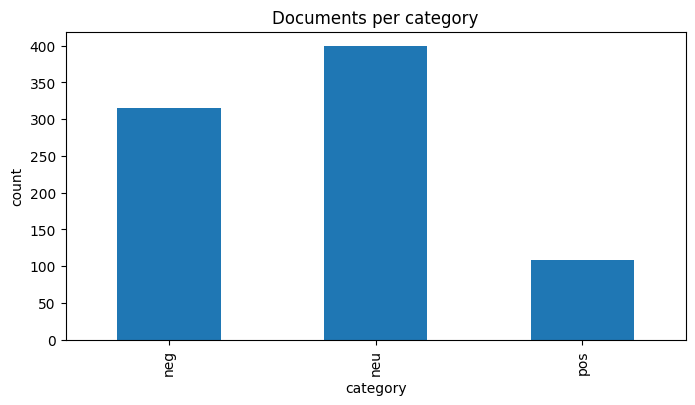

In [ ]:
# Class balance
ax = X['category_name'].value_counts().sort_index().plot(
    kind='bar', figsize=(8,4), title='Documents per category'
)
ax.set_xlabel('category'); ax.set_ylabel('count')
# Simple token/word length (fast and robust)
X['n_words'] = X['text'].str.split().str.len()

# Boxplot per category
ax = X.boxplot(column='n_words', by='category_name', grid=False, vert=False, figsize=(9,4))
ax.set_title('Document length (words) by category'); ax.set_xlabel('words'); 
ax.figure.suptitle('')



In [17]:
text_col  = _pick_col(df.columns, ["text"])
label_col = _pick_col(df.columns, ["label", "sentiment", "target"])

X = (
    df[[text_col, label_col]]
    .rename(columns={text_col: "text", label_col: "label"})
    .dropna(subset=["text", "label"])
    .copy()
)

label_map = {-1.0: "neg", 0.0: "neu", 1.0: "pos", -1: "neg", 0: "neu", 1: "pos"}
X["category_name"] = X["label"].map(label_map).fillna(X["label"].astype(str))

display(X.head(3)[["text", "category_name"]])
print("Class counts:\n", X["category_name"].value_counts())


,text,category_name
0,Calls on retards,neg
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,pos
2,Seeing lots of red in the ticker.,neu


Class counts:
 category_name
neu    331
pos    319
neg    197
Name: count, dtype: int64


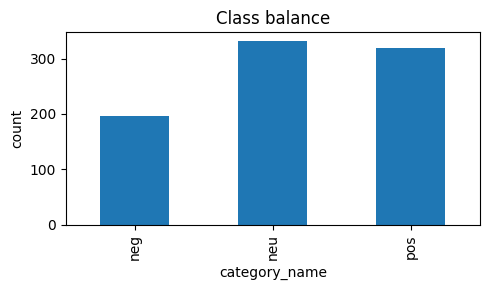

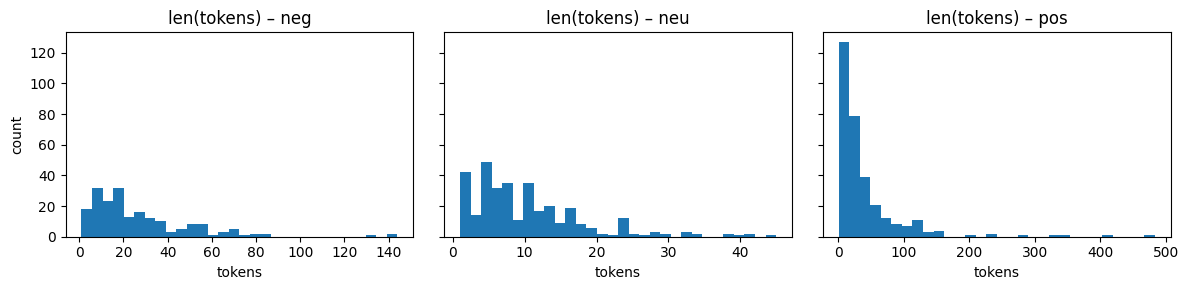

In [18]:
# Class balance
plt.figure(figsize=(5,3))
X["category_name"].value_counts().sort_index().plot(kind="bar")
plt.title("Class balance")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# Token lengths per class
X["n_tokens"] = X["text"].str.split().str.len().fillna(0).astype(int)
labels = sorted(X["category_name"].unique())

fig, axes = plt.subplots(1, len(labels), figsize=(12,3), sharey=True)
for ax, lab in zip(np.ravel(axes), labels):
    ax.hist(X.loc[X["category_name"]==lab, "n_tokens"], bins=30)
    ax.set_title(f"len(tokens) – {lab}")
    ax.set_xlabel("tokens")
axes[0].set_ylabel("count")
plt.tight_layout()
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", min_df=5, max_df=0.5)
X_tfidf = tfidf.fit_transform(X["text"])
terms = np.array(tfidf.get_feature_names_out())

def top_terms_for(label, k=10):
    mask = (X["category_name"] == label).to_numpy()
    mean_tfidf = np.asarray(X_tfidf[mask].mean(axis=0)).ravel()
    idx = mean_tfidf.argsort()[-k:][::-1]
    return terms[idx], mean_tfidf[idx]


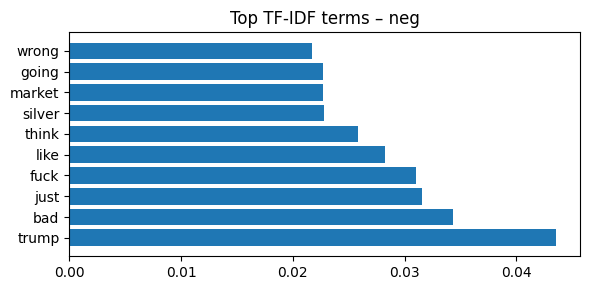

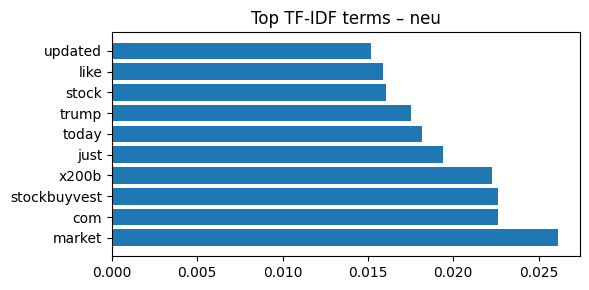

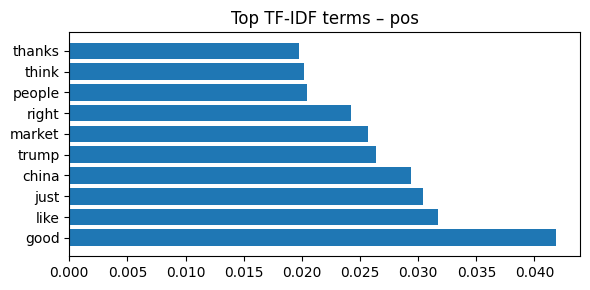

In [20]:
for lab in labels:
    tt, vals = top_terms_for(lab, k=10)
    plt.figure(figsize=(6,3))
    y = np.arange(len(tt))[::-1]
    plt.barh(y, vals[::-1])
    plt.yticks(y, tt[::-1])
    plt.title(f"Top TF-IDF terms – {lab}")
    plt.tight_layout()
    plt.show()


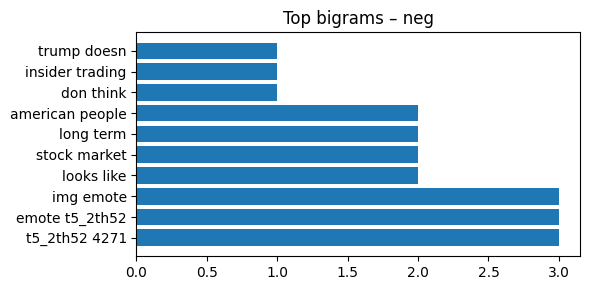

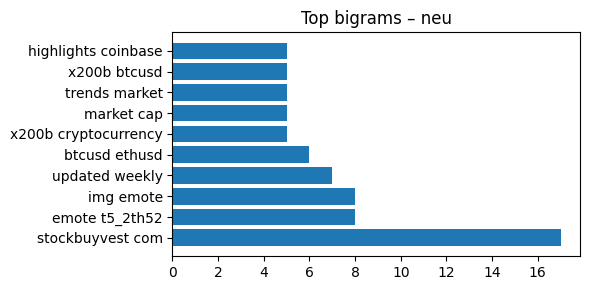

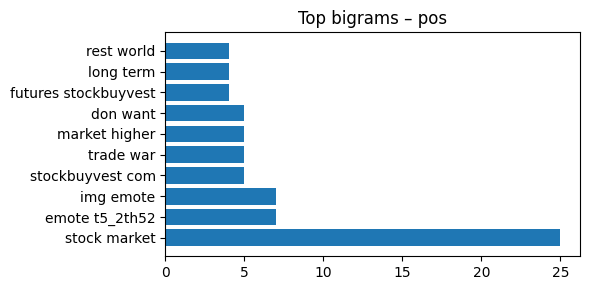

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

bi = CountVectorizer(ngram_range=(2,2), stop_words="english", min_df=5, max_df=0.5)
X_bi = bi.fit_transform(X["text"])
bigrams = np.array(bi.get_feature_names_out())

def top_bigrams_for(label, k=10):
    mask = (X["category_name"] == label).to_numpy()
    counts = np.asarray(X_bi[mask].sum(axis=0)).ravel()
    idx = counts.argsort()[-k:][::-1]
    return bigrams[idx], counts[idx]

for lab in labels:
    tt, vals = top_bigrams_for(lab, k=10)
    plt.figure(figsize=(6,3))
    y = np.arange(len(tt))[::-1]
    plt.barh(y, vals[::-1])
    plt.yticks(y, tt[::-1])
    plt.title(f"Top bigrams – {lab}")
    plt.tight_layout()
    plt.show()


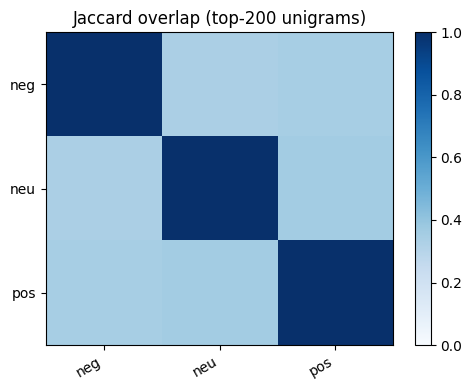

In [22]:
# Build set of top N unigrams per class using TF-IDF means
N = 200
def top_unigram_set(label, N=200):
    mask = (X["category_name"] == label).to_numpy()
    mean_tfidf = np.asarray(X_tfidf[mask].mean(axis=0)).ravel()
    idx = mean_tfidf.argsort()[-N:][::-1]
    return set(terms[idx])

top_sets = {lab: top_unigram_set(lab, N=N) for lab in labels}

def jacc(a, b):
    return len(a & b) / len(a | b) if (a | b) else 0.0

mat = []
for a in labels:
    row = []
    for b in labels:
        row.append(jacc(top_sets[a], top_sets[b]))
    mat.append(row)

overlap = pd.DataFrame(mat, index=labels, columns=labels)

# Use matplotlib imshow (not pandas .plot(kind='imshow'), which is invalid)
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(overlap.values, cmap='Blues', aspect='auto', vmin=0, vmax=1)
ax.set_title(f'Jaccard overlap (top-{N} unigrams)')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here